In [1]:
import platform
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
%matplotlib inline

if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

expert_data = pd.read_excel('국가별수출입 실적.xls')

In [93]:
expert_data = expert_data.dropna()
expert = expert_data.set_index("국가명")
expert

,기간,수출건수,수출금액,수입건수,수입금액,무역수지
국가명,,,,,,
중국,2021,569016,36400747,1315725,30643442,5757306
미국,2021,536821,22760363,4891520,16985784,5774579
베트남,2021,156220,12763574,147505,5836335,6927239
홍콩,2021,90885,8362706,131599,581869,7780837
일본,2021,989306,6844422,571685,12911935,6067513
...,...,...,...,...,...,...
코스 군도,2021,0,0,2,8,8
보빗군도,2021,0,0,1,0,0
니우에,2021,0,0,3,29,29


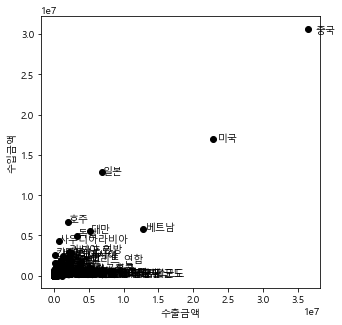

In [94]:
plt.figure(figsize = (5,5))
plt.scatter(expert["수출금액"],expert["수입금액"],c = "k", marker="o")
plt.xlabel("수출금액")
plt.ylabel("수입금액")

for n in range(expert.shape[0]):
    plt.text(expert["수출금액"][n]*1.03,expert["수입금액"][n]*0.98, expert.index[n])

In [95]:
expert = expert.drop(["중국","미국","베트남","홍콩","일본"], errors = 'ignore')
expert = expert.sort_values(by="수출건수", ascending = False)
expert

,기간,수출건수,수출금액,수입건수,수입금액,무역수지
국가명,,,,,,
싱가포르,2021,121082,2451532,45695,2802692,351159
대만,2021,84183,5162802,74400,5514700,351898
인도네시아,2021,68958,1870012,24582,2228801,358789
말레이시아,2021,68803,2135008,38048,2328574,193567
인도,2021,60923,3892589,49262,1657619,2234971
...,...,...,...,...,...,...
코스 군도,2021,0,0,2,8,8
보빗군도,2021,0,0,1,0,0
니우에,2021,0,0,3,29,29


In [96]:
expert = expert[["수출금액","수입금액"]]
expert = expert[:24]
expert.tail()

,수출금액,수입금액
국가명,,
아랍에미리트 연합,828011,1729828
이탈리아,1054419,1939033
스페인,734891,541282
이집트,369117,127406
칠레,350967,1106706


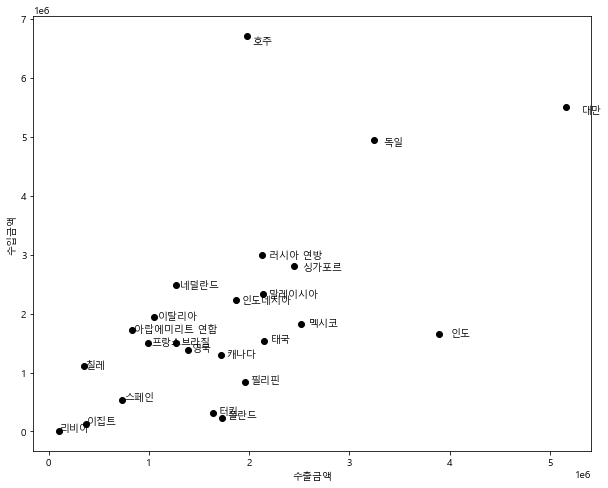

In [90]:
plt.figure(figsize = (10,8))
plt.scatter(expert["수출금액"],expert["수입금액"],c = "k", marker="o")
plt.xlabel("수출금액")
plt.ylabel("수입금액")

for n in range(expert.shape[0]):
    plt.text(expert["수출금액"][n]*1.03,expert["수입금액"][n]*0.98, expert.index[n])

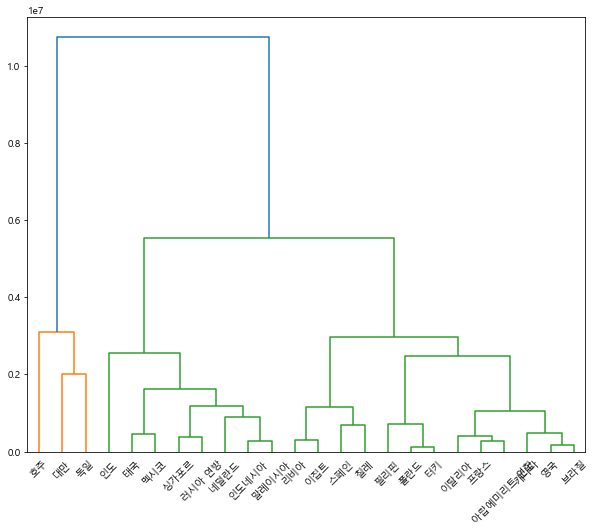

In [70]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(10,8))

link_dist = linkage(expert, metric='euclidean', method = 'ward')
dendrogram(link_dist, labels = expert.index)
plt.show()

In [71]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3).fit(expert)
centers = kmeans.cluster_centers_

kmeans.labels_

array([1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [72]:
centers

array([[1087692.61538462,  962121.07692308],
       [2300682.625     , 2233279.        ],
       [3460361.33333333, 5722121.66666667]])

In [73]:
expert.loc[:,"클러스터"] = kmeans.labels_
expert.head()

,수출금액,수입금액,클러스터
국가명,,,
싱가포르,2451532,2802692,1
대만,5162802,5514700,2
인도네시아,1870012,2228801,1
말레이시아,2135008,2328574,1
인도,3892589,1657619,1


In [74]:
expert['클러스터'] = kmeans.labels_

In [75]:
expert.drop('클러스터', axis = 1, inplace=True)
expert.head()

,수출금액,수입금액
국가명,,
싱가포르,2451532,2802692
대만,5162802,5514700
인도네시아,1870012,2228801
말레이시아,2135008,2328574
인도,3892589,1657619


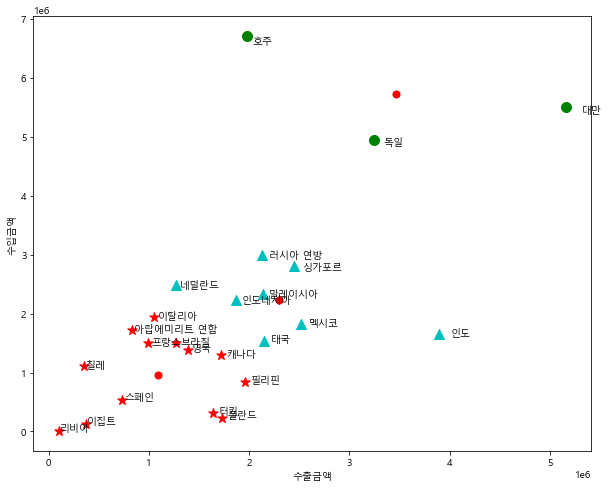

In [76]:
my_markers=['*','^', 'o','^','.',',','1','2']
my_color =['r','c','g','b','g','k','r','y']

plt.figure(figsize=(10, 8))
plt.xlabel('수출금액')
plt.ylabel('수입금액')
for n in range(expert.shape[0]):
    label = kmeans.labels_[n]
    plt.scatter(expert['수출금액'][n], expert['수입금액'][n], c=my_color[label], marker=my_markers[label], s=100)
    plt.text(expert['수출금액'][n]*1.03, expert['수입금액'][n]*0.98, expert.index[n])
    
for i in range(kmeans.n_clusters):
    plt.scatter(centers[i][0], centers[i][1], c = 'r', s= 50)